In [1]:
import os
import pandas as pd
import json
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sq3

In [2]:
#Loading in the bike station data, parsed in the previous step
bike_station_info = pd.read_csv('all_bike_stations_toronto.csv')
yelp_poi_info = pd.read_csv('yelp_poi_info.csv')

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
bike_station_info

,Unnamed: 0,bikes_no,longitude,latitude
0,0,18,-79.319796,43.665269
1,1,3,-79.445947,43.671420
2,2,20,-79.317693,43.666224
3,3,10,-79.376716,43.653236
4,4,10,-79.380288,43.663722
...,...,...,...,...
669,669,7,-79.219952,43.735967
670,670,0,-79.287660,43.715466
671,671,4,-79.437461,43.642904
672,672,1,-79.268510,43.706880


In [4]:
yelp_poi_info = yelp_poi_info.iloc[:,1:]
yelp_poi_info

,name,rating,address,latitude,longitude,distance
0,Betty’s East,4.5,1301 Queen Street E,43.663455,-79.327992,689.778721
1,Lloyd's On Queen,5.0,1298 Queen St E,43.663801,-79.328356,707.598820
2,Boardwalk Place,2.5,1675 Lake Shore Boulevard E,43.663010,-79.310898,758.567399
3,Baldev Paan Cold Drink House,3.0,1399 Gerrard Street E,43.671710,-79.323520,772.512252
4,Two Headed Dog,2.5,1469 Gerrard Street E,43.672358,-79.320782,792.227554
5,The Thirsty Loon,4.0,1489 Gerrard Street E,43.672394,-79.319906,792.332218
6,Lake Inez,4.5,1471 Gerrard Street E,43.672340,-79.320640,794.661955
7,Black Pony,4.5,1481 Gerrard Street E,43.672410,-79.320400,805.518073
8,Jenni Place,3.0,1338 Gerrard Street E,43.671800,-79.324810,829.759140
9,Beach Club,3.0,1681 Lake Shore Boulevard E,43.663207,-79.310013,839.312073


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [5]:
#Does this distance from a bike stop effect the rating of a bar?

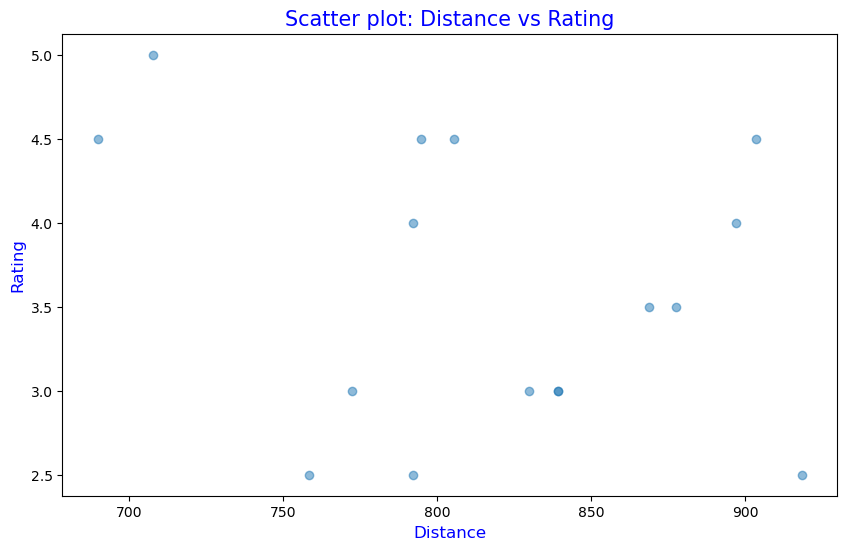

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(yelp_poi_info['distance'], yelp_poi_info['rating'], alpha=0.5)
plt.title('Scatter plot: Distance vs Rating', fontsize=15, color='blue')
plt.xlabel('Distance', fontsize=12, color='blue')
plt.ylabel('Rating', fontsize=12, color='blue')
plt.show()

## Why did we use a scatterplot?

We used a scatter plot in order to visually see the spread of the data and how strong of a corelation their might be between Distance and Rating.

In [ ]:
#The skew of the data

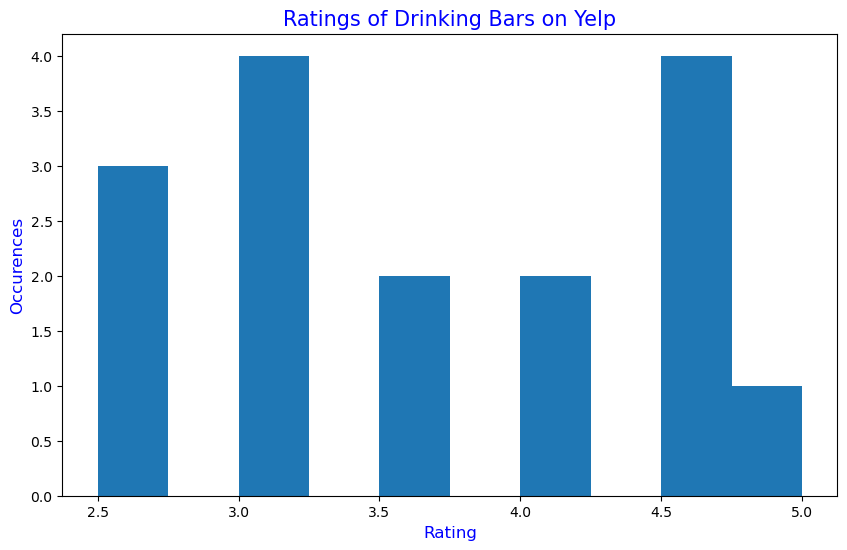

In [10]:
plt.figure(figsize=(10,6))
plt.hist(yelp_poi_info['rating'])
plt.title('Ratings of Drinking Bars on Yelp', fontsize=15, color='blue')
plt.xlabel('Rating', fontsize=12, color='blue')
plt.ylabel('Occurences', fontsize=12, color='blue')
plt.show()

### Hypothesis testing (The question we are askimng)

**H0**: There is not a correlation between distance of bike stop to a bar and the rating of the bar.

**HA**: There is a correlation between distance of bike stop to a bar and the rating of the bar.


---

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [50]:
conn = sq3.connect('bike_data.db')

In [51]:
yelp_poi_info.to_sql('yelp_data', conn, if_exists='replace', index=False)

16

In [55]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,yelp_data


Look at the data before and after the join to validate your data.

In [53]:
df = pd.read_sql_query("SELECT * from yelp_data", conn)
df

,name,rating,address,latitude,longitude,distance
0,Betty’s East,4.5,1301 Queen Street E,43.663455,-79.327992,689.778721
1,Lloyd's On Queen,5.0,1298 Queen St E,43.663801,-79.328356,707.598820
2,Boardwalk Place,2.5,1675 Lake Shore Boulevard E,43.663010,-79.310898,758.567399
3,Baldev Paan Cold Drink House,3.0,1399 Gerrard Street E,43.671710,-79.323520,772.512252
4,Two Headed Dog,2.5,1469 Gerrard Street E,43.672358,-79.320782,792.227554
5,The Thirsty Loon,4.0,1489 Gerrard Street E,43.672394,-79.319906,792.332218
6,Lake Inez,4.5,1471 Gerrard Street E,43.672340,-79.320640,794.661955
7,Black Pony,4.5,1481 Gerrard Street E,43.672410,-79.320400,805.518073
8,Jenni Place,3.0,1338 Gerrard Street E,43.671800,-79.324810,829.759140
9,Beach Club,3.0,1681 Lake Shore Boulevard E,43.663207,-79.310013,839.312073


Our data looks good, just the way imported into the data base.

In [58]:
conn.close()